# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 3 K-Nearest Neighbor ##
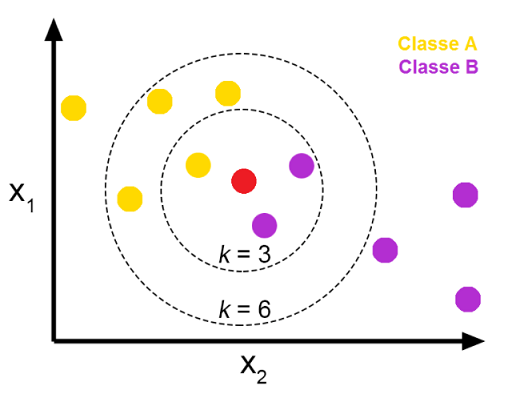

## Before We Begin ##

Run the code in the following two code cells to "mount" the Google drive directory.

## Mount Google Drive
Download and save a copy of the Lab3 folder, including the Notebook and an excel file (i.e. *adult.csv*), to your Google Drive, ensuring that all the files are in the same location.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive"

/content/drive/My Drive


In [ ]:
import pandas as pd
data = pd.read_csv('adult.csv', index_col=False)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,no
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,no
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,no
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,no
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,no
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,yes
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,no
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,no


From the above, we can see the content of the dataset. There are in total 32560 samples containing 14 attributes and a final prediction goal attribute. This dataset targets to predict whether income exceeds $50K/yr based on census data. It is also known as the "Census Income" dataset.

In [ ]:
data.iloc[14:15]
# iloc is a purely integer-location based indexing for selection by position, but in order to show the target row in a dataframe structure, better to use iloc[position:position+1] instead of iloc[position]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50k
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,yes


There are missing values in this dataset. An example is illustrated above. To remove NaN values in the dataframe, we replace them with the average value (taking the average is to prevent the attribute with NaN value be assigned a significant value that dominates the prediction).

In [ ]:
for k in data.keys():
  if(type(data[k][0])==str):
    # ffill means forward fill that fill the NaN entry with the last seen items within the same attribute column (contrastively, bfill means backward fill)
    data[k].fillna(method='ffill', inplace=True)
  else:
    # here fill the NaN entry with the mean value of the attribute column
    data[k].fillna(data[k].mean(), inplace=True)
data.iloc[14:15]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50k
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,yes


Within the 14 attributes, the attributes with text values need to be converted into float type to create the vector representation for each data sample **<font color="green">(a TODO here)</font>**.

In [ ]:
# TODO: convert the data from str to float
# you can use your own method to process, e.g. the LabelEncoder function introduced in the lecture
# target result is stated in below cell

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50k
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


The dataframe can now be converted into a NumPy array. Then we will need to split the data into the vector representation X that doesn't contain the target goal and the target ground-truth y **<font color="green">(a TODO here)</font>**.

In [ ]:
from sklearn.model_selection import train_test_split
vectors = data.to_numpy()
print(vectors.shape)
# vector represntation X in shape (32561, 14)
# groundtruth y in shape (32561,)
# TODO: assign X and y

(32561, 15)


Standardization will be performed on X to prevent attributes with large values like fnlwgt dominating the prediction **<font color="green">(a TODO here)</font>**.

In [ ]:
# TODO: standardization need to be performed for different attributes for the attribute corresponding mean and sd

For your self-checking, the mean and sd for the 1st attribute are 38.58164675532078 and 13.640223092304275.

The vectorized data will then be split into a training and testing set for further processing.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
# test_size: data is splited into train and test set in ratio of 8:2
# random_state: this control the shuffle applied to the data before applying the split, in order to do the final checking, an fix value of 3 is passed here to make the output reproducible

Next, we model the data using KNN and predict y_pred using the X_test data using K=5. **<font color="green">(a TODO here)</font>**

In [ ]:
# TODO: KNN classification

The model performance is evaluated with the F1 metric, 

>$ \text{F1 score} = 2 ⋅ \frac{recall \cdot precision}{recall + precision}$

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png width="400"> </img>

While,
>$Accuracy = \frac{\text{True Positive}+\text{True Negative}}{(\text{True Positive}+\text{True Negative}+\text{False Positive}+\text{False Negative})}$

Accuracy measure doesn't take the data distribution into consideration, so when there are imbalance classes, we may still get a high accuracy score even though the model is doing a poor prediction on one class. So f1 metrics is more commonly used to prevent this issue. You can check out https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 for further explanation and an example illustration. 


Our dataset is also an example of imbalanced class distribution.

In [ ]:
# value_counts: it counts the occurance of unique values
data['>50k'].value_counts()

no     24720
yes     7841
Name: >50k, dtype: int64

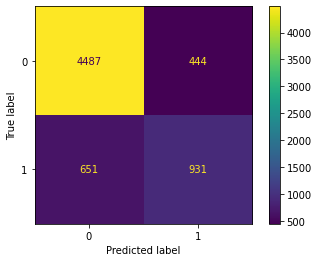

In [ ]:
# confusion_matrix: return array containing [[True Negative, False Positive],
#                                            [False Negative, True Positive]]
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
# f1_score = 2 * (recall * precision)/(recall + precision)
metrics.f1_score(y_test, y_pred)

0.6296922556645249

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.831874712114233

Self checking of the predicted result:

In [ ]:
import pandas as pd
TA_y_pred = pd.read_csv('y_pred.csv', header=None).to_numpy()

In [ ]:
(TA_y_pred==y_pred).all() # see if y_pred is the same and return True

True

# Unmount Google Drive

In [ ]:
drive.flush_and_unmount()